<a href="https://colab.research.google.com/github/aerau05/ml_assignments/blob/main/KNN_assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.
1. What is the difference between regression and classification?

Regression predicts a continuous numerical value (like a price or temperature), while classification predicts a category or label (like diseased vs. healthy)

2. What is a confusion table/matrix? What does it help us understand about a model's performance?

A confusion matrix is a table that compares a model's predicted labels to the true labels. It shows true positives, true negatives, false positives, and falst negatives, which helps us understand what types of errors the model is making and wether it has biases.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is the ratio of correct predictions to total predictions. It can be misleading when classes are imbalanced becasue a model can get a high level of accuracy by always predicting the majority class while performing poorly on teh minority cases.

4. What does the root mean squared error quantify about a particular model?

Root mean squared error quantifies the average magnitude of the model's prediction errors.

5. What are overfitting and underfitting?

Underfitting is when a model is too simple to capture the patterns in the data and performs poorly on both training and test data. Overfitting is when a model is too complex so it picks up the patterns in the training data, but fails on unseen test data.

6. Why does splitting the data into training and testing sets, and choosing
 by evaluating accuracy or RMSE on the test set, improve model performance?

Seperating the data into training and test sets allows us to train the model on one part of the data and the nevaluate it on unseen test data to see how well the model is working and if it is biased. Basically, it prevents overfitting.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Hard classification (class label prediction) is good because it is simple to interpret, but it does not convey confidence for the prediction so it can be misleading when probabilites are close. Soft classification (probability distribution prediction) is good becuase it provides information about uncertainty and confidence which allows for flexible decision thresholds and better risk-based decision making. But, it is weak because its more complex to interpret and often requires additional steps to conver the probabilites into class labesl for practical decisions.

In [1]:
! git clone https://github.com/aerau05/scratchpad
%cd scratchpad
!ls
%run get_data.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cloning into 'scratchpad'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 27 (delta 4), reused 4 (delta 4), pack-reused 18 (from 1)
Receiving objects: 100% (27/27), 44.09 KiB | 2.20 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/scratchpad
'ds3001(1_20).ipynb'   get_data.py   nb_2026_01_05.ipynb   README.md
Download complete
Extracting data files...
Data extracted


    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB
None
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64
            voltage    height      soil
mine_type                              
1          0.296463  0.495519  0.492958
2          0.721123  0.487013  0.508571
3          0.402408  0.527548  0.496970
4          0.345365  0.506887  0.503030
5          0.379598  0.530070  0.516923


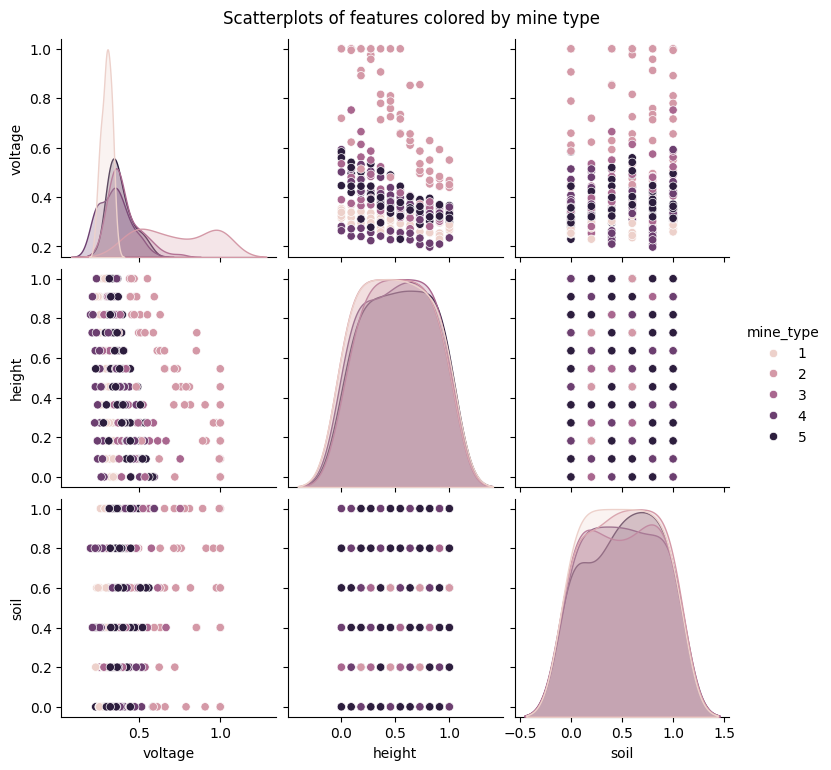

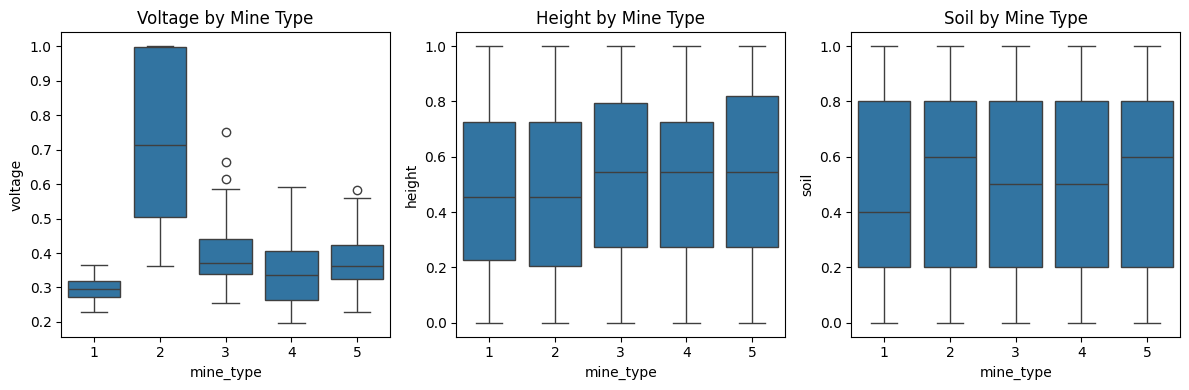

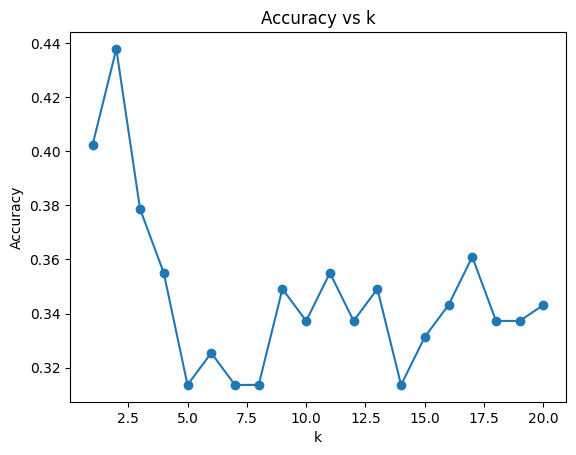

Best k: 2
selected k by testing multiple values and choosing the one that maximizes accuracy on the test set.


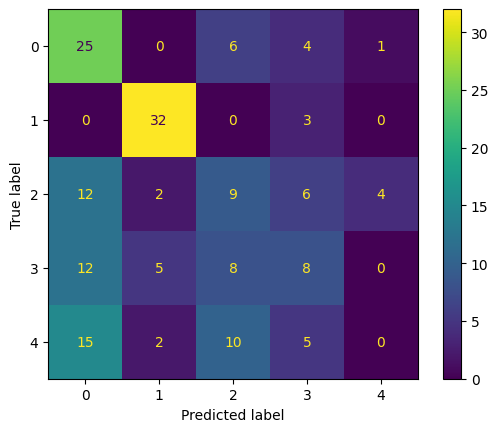

Test Accuracy: 0.4378698224852071
The confusion matrix shows which mine types are frequently confused. 
For example mine types 3 and 4 were commonly confused with other types.

Part 5. 
Although the classifier achieves reasonably high accuracy for some mine types, it still makes dangerous erros by misclassifying certain mines. 
In practice, this model shold not be used as a sole decision making tool. 
Instead, it should be used as a decision-support system to flag likely mine types and provide probabilites, combined with human inpsection and additional sensors.


In [19]:
# Q2.

# 1.) load and inspect the data
df=pd.read_csv('/content/scratchpad/data/land_mines.csv')
print(df.head())
print(df.info())

# distribution of mine_type variable
print(df['mine_type'].value_counts())
print(df.groupby("mine_type")[["voltage", "height", "soil"]].mean())

# scatter plots to show feature relationships
sns.pairplot(df,hue='mine_type')
plt.suptitle('Scatterplots of features colored by mine type', y=1.02)
plt.show()

# box plots of feature distributions by class
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x="mine_type", y="voltage", data=df)
plt.title("Voltage by Mine Type")
plt.subplot(1,3,2)
sns.boxplot(x="mine_type", y="height", data=df)
plt.title("Height by Mine Type")
plt.subplot(1,3,3)
sns.boxplot(x="mine_type", y="soil", data=df)
plt.title("Soil by Mine Type")
plt.tight_layout()
plt.show()

# 2.) split data into 50/50 training and testing
from sklearn.model_selection import train_test_split
X = df[["voltage", "height", "soil"]]
y = df["mine_type"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y)

# 3.)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

# Plot accuracy vs k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.show()
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k:", best_k)
print ('selected k by testing multiple values and choosing the one that maximizes accuracy on the test set.')

# 4.)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print('The confusion matrix shows which mine types are frequently confused. \nFor example mine types 3 and 4 were commonly confused with other types.')

# 5.)
print('\nPart 5. \nAlthough the classifier achieves reasonably high accuracy for some mine types, it still makes dangerous erros by misclassifying certain mines. \nIn practice, this model shold not be used as a sole decision making tool. \nInstead, it should be used as a decision-support system to flag likely mine types and provide probabilites, combined with human inpsection and additional sensors.')


   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Shape: (2499, 3)
<bound method DataFrame.sum of       price   year  mileage
0     False  False    False
1     False  False    False
2     False  False    False
3     False  False    False
4     False  False    False
...     ...    ...      ...
2494  False  False    False
2495  False  False    False
2496  False  False    False
2497  False  False    False
2498  False  False    False

[2499 rows x 3 columns]>


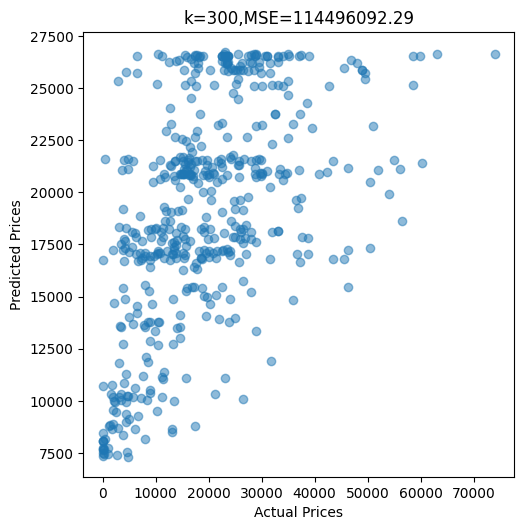

k=3, MSE=148065935.52
k=10, MSE=117399126.11
k=25, MSE=112576160.82
k=50, MSE=110202549.30
k=100, MSE=112253702.97
k=300, MSE=114496092.29
Optimal k: 50

Part 6. patterns as k increases
With a small k, like 3, the predictions track closely with the individual data points but are sensitive to noise so this is an example of overfitting.
A medium k, like 25 or 50, provides the best generalization as the points cluster closer to a diagnol line (or y=x)
The large k values, 100 and 300, make the predictions collapse towards the average price turning it into a horizontal line which means its showing underfitting.


In [48]:
# Q3
# 1. load and clean data
df=pd.read_csv('/content/scratchpad/data/USA_cars_datasets.csv')
df=df[['price','year','mileage']]
print(df.head())
print('Shape:',df.shape)
print(df.isna().sum)
df=df.dropna()

# 2. min-max normalize year and mileage
from sklearn.preprocessing import MinMaxScaler
X=df[['year','mileage']]
y=df['price']
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# 3. train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#4. k-NN regression for different k values
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_values=[3,10,25,50,100,300]
mse_results={}
plt.figure(figsize=(15,10))
for i, k in enumerate(k_values):
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  mse_results[k]=mse
plt.subplot(2,3,i)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'k={k},MSE={mse:.2f}')
plt.tight_layout()
plt.show()
for k, mse in mse_results.items():
  print(f'k={k}, MSE={mse:.2f}')

# 5. determine optimal k
best_k=min(mse_results, key=mse_results.get)
print('Optimal k:', best_k)

# 6. patterns as k increases
print('\nPart 6. patterns as k increases')
print('With a small k, like 3, the predictions track closely with the individual data points but are sensitive to noise so this is an example of overfitting.')
print('A medium k, like 25 or 50, provides the best generalization as the points cluster closer to a diagnol line (or y=x)')
print('The large k values, 100 and 300, make the predictions collapse towards the average price turning it into a horizontal line which means its showing underfitting.')

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

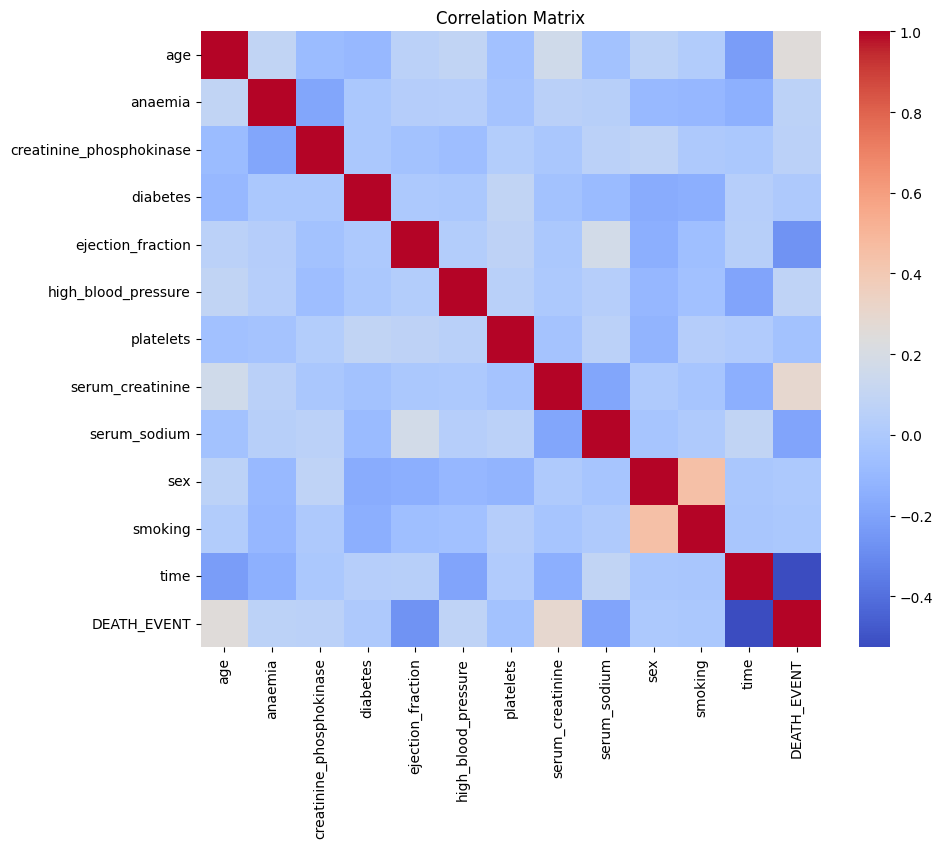

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64
Variables like serum_creatinine and age show the storngest positive correlations with DEATH_EVENT while time shows the strongest inverse relationship.

anaemia
anaemia
0    0.294118
1    0.356589
Name: DEATH_EVENT, dtype: float64

diabetes
diabetes
0    0.321839
1    0.320000
Name: DEATH_EVENT, dtype: float64

high_blood_pressure
high_blood_pressure
0    0.293814
1    0.371429
Name: DEATH_EVENT, dtype: float64

sex
sex
0    0.323810
1    0.319588
Name: DEATH_EVENT, dtype: float64


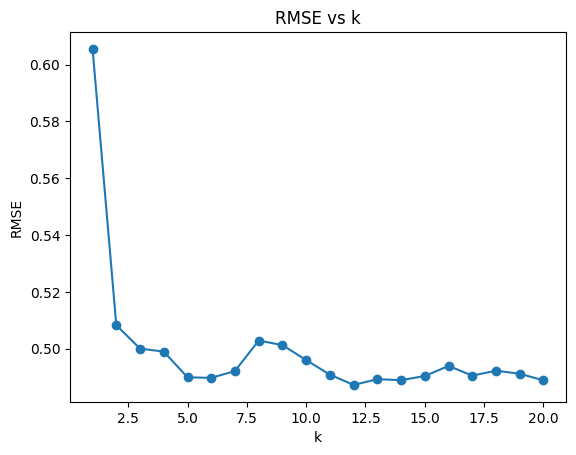

Best k: 12
Best RMSE: 0.48722095527518033


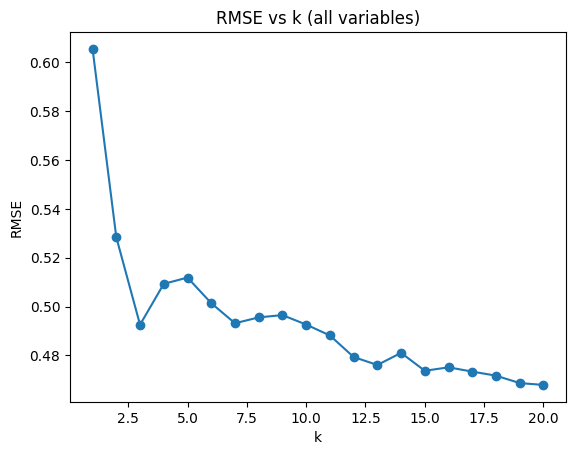

Best k (all vars): 20
Best RMSE (all vars): 0.4678853135830047

Including all variables does not always improve predictive performance. 
While additional variables may contain useful information, they can also introduce noise which can worsen kNN performance
I would prefer the model using fewer, more interpretable variables with similar RMSE since it is simplier and less prone to overfitting
RMSE changed only a little when adding/ removing variables showing that a small subset of highly predictive variables accounts for most of the predictive power.


In [39]:
# Q4
# 1. load data and handle NAs
df=pd.read_csv('/content/scratchpad/data/heart_failure_clinical_records_dataset.csv')
print(df.head())
print(df.info())
print(df.isna().sum)
df.dropna()
df.drop(columns=['time'])

#2. correlation matrix
plt.figure(figsize=(10, 8))
corr=df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(corr['DEATH_EVENT'].sort_values(ascending=False))
print('Variables like serum_creatinine and age show the storngest positive correlations with DEATH_EVENT while time shows the strongest inverse relationship.')

# 3. dummy variables
dummy_vars=['anaemia','diabetes','high_blood_pressure','sex','smoking']
for var in dummy_vars:
  print(f"\n{var}")
  print(df.groupby(var)['DEATH_EVENT'].mean())
print('For most of the variables (all except smoking and sex), the proportion of deaths is higher when the variable equals 1 than when it equals 0.')

# 4. matrix of risk factors
selected_vars=['anaemia','diabetes','high_blood_pressure']
X=df[selected_vars]
y=df['DEATH_EVENT']

# 5. max-min normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# 6. split training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#7. choosing optimal K from selected variables
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_vals=range(1,21)
rmse_vals=[]
for k in k_vals:
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,y_train)
  preds=knn.predict(X_test)
  rmse=np.sqrt(mean_squared_error(y_test,preds))
  rmse_vals.append(rmse)
plt.plot(k_vals, rmse_vals, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs k')
plt.show()
best_k=k_vals[rmse_vals.index(min(rmse_vals))]
print('Best k:', best_k)
print('Best RMSE:',min(rmse_vals))

# 8. choosing K from all variables
X_all = df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']
scaler_all=MinMaxScaler()
X_all_scaled=scaler_all.fit_transform(X_all)
X_train_all, X_test_all, y_train_all, y_test_all=train_test_split(X_all_scaled, y, test_size=0.2, random_state=42)
rmse_vals_all=[]
for k in k_vals:
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train_all,y_train_all)
  preds=knn.predict(X_test_all)
  rmse=np.sqrt(mean_squared_error(y_test_all,preds))
  rmse_vals_all.append(rmse)
plt.plot(k_vals, rmse_vals_all, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs k (all variables)')
plt.show()
best_k_all=k_vals[np.argmin(rmse_vals_all)]
print('Best k (all vars):', best_k_all)
print('Best RMSE (all vars):', min(rmse_vals_all))
# explanation:
print('\nIncluding all variables does not always improve predictive performance. \nWhile additional variables may contain useful information, they can also introduce noise which can worsen kNN performance')
print('I would prefer the model using fewer, more interpretable variables with similar RMSE since it is simplier and less prone to overfitting')
print('RMSE changed only a little when adding/ removing variables showing that a small subset of highly predictive variables accounts for most of the predictive power.')
